### Import Required Libraries

In [2]:
import requests
import json
import matplotlib.pyplot as plt
import datetime

### Define the API Key and Endpoint

In [5]:
API_KEY = "NQW4N58WD32H3H7W"  # Replace with your actual API key
BASE_URL = "https://www.alphavantage.co/query"

### Function to Fetch Stock Data

In [8]:
def fetch_stock_data(symbol):
    params = {
        "function": "TIME_SERIES_DAILY", ## Fetch daily stock prices.
        "symbol": symbol, ## The stock symbol (e.g., AAPL for Apple)
        "apikey": API_KEY 
    }
    try:
        response = requests.get(BASE_URL, params=params) ## Makes a GET request to the API with the specified parameters.
        response.raise_for_status()
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None


### Extract and Process the Stock Data

In [11]:
def process_stock_data(data):
    try:
        time_series = data["Time Series (Daily)"] ## Extracts the "Time Series (Daily)" data
        dates = []                                ## Converts date strings to datetime objects
        closing_prices = []                       ## Extracts closing prices and converts them to floats

        for date, values in time_series.items():
            dates.append(datetime.datetime.strptime(date, "%Y-%m-%d"))
            closing_prices.append(float(values["4. close"]))

        return dates, closing_prices
    except KeyError:                             ## Manages cases where the data format is incorrect
        print("Error: Invalid data format.")
        return None, None


### Plot the Stock Prices

In [14]:
def plot_stock_prices(dates, prices, symbol):          ## Plots dates on the x-axis and prices on the y-axis
    plt.figure(figsize=(10, 6))
    plt.plot(dates, prices, marker='o', linestyle='-', color='b')
    plt.title(f"Stock Price Trend for {symbol}")
    plt.xlabel("Date")
    plt.ylabel("Closing Price (USD)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Enter the stock symbol (e.g., AAPL for Apple):  BSE


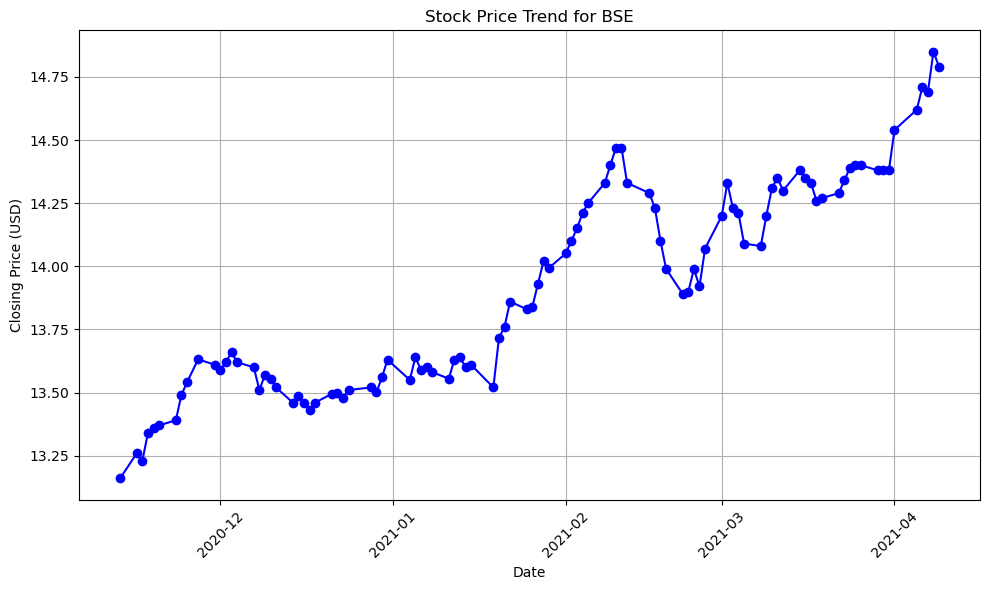

In [18]:
def main():
    symbol = input("Enter the stock symbol (e.g., AAPL for Apple): ").upper()
    data = fetch_stock_data(symbol)
    if data:
        dates, prices = process_stock_data(data)
        if dates and prices:
            plot_stock_prices(dates, prices, symbol)

if __name__ == "__main__":
    main()